<a href="https://colab.research.google.com/github/WalterLimaViana/Projeto_parceria_semantix/blob/master/Projeto_Semantrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-gbq --quiet

In [ ]:
import pandas as pd

from pandas_gbq import read_gbq

In [ ]:
query = """
    SELECT *
    FROM `curso-ebac-462701.chicago_crime_data.crime`
    LIMIT 1000
"""


In [ ]:
# Extract project ID from the query string
project_id = query.split(".")[0].split("`")[1]

df = read_gbq(query, project_id=project_id, dialect='standard')

Downloading: 100%|██████████|


In [ ]:
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10399299,HZ136111,2016-02-01 00:30:00+00:00,0000X E LOWER WACKER DR,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,SIDEWALK,False,False,...,42,32,02,1176671.0,1902172.0,2016,2018-02-10 15:50:01+00:00,41.886909,-87.626668,"(41.886909333, -87.626667672)"
1,12401183,JE274176,2021-06-20 18:00:00+00:00,002XX N WABASH AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL / MOTEL,False,False,...,42,32,02,1176777.0,1901808.0,2021,2021-06-27 15:40:29+00:00,41.885908,-87.626289,"(41.885908101, -87.626289429)"
2,12468728,JE356760,2021-08-22 00:00:00+00:00,002XX N WABASH AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL / MOTEL,False,False,...,42,32,02,1176777.0,1901808.0,2021,2021-09-02 15:41:42+00:00,41.885908,-87.626289,"(41.885908101, -87.626289429)"
3,12490107,JE382792,2021-09-22 04:40:00+00:00,002XX N WABASH AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL / MOTEL,False,False,...,42,32,02,1176777.0,1901808.0,2021,2021-09-29 15:41:20+00:00,41.885908,-87.626289,"(41.885908101, -87.626289429)"
4,9306573,HW450659,2011-12-20 14:00:00+00:00,001XX N STATE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,COLLEGE/UNIVERSITY GROUNDS,False,False,...,42,32,02,1176336.0,1901423.0,2011,2016-02-04 06:33:39+00:00,41.884862,-87.627920,"(41.8848616, -87.627920479)"


In [ ]:
# Verificar dados ausentes
df.isnull().sum()

# Estatísticas descritivas
df.describe()

# Informações sobre o DataFrame
df.info()

# Contagem de valores em uma coluna interessante
df['year'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_key            1000 non-null   Int64              
 1   case_number           1000 non-null   object             
 2   date                  1000 non-null   datetime64[us, UTC]
 3   block                 1000 non-null   object             
 4   iucr                  1000 non-null   object             
 5   primary_type          1000 non-null   object             
 6   description           1000 non-null   object             
 7   location_description  999 non-null    object             
 8   arrest                1000 non-null   boolean            
 9   domestic              1000 non-null   boolean            
 10  beat                  1000 non-null   Int64              
 11  district              1000 non-null   Int64              
 12  ward   

,count
year,
2018,81
2019,76
2017,66
2001,52
2016,50
2023,49
2015,47
2024,42
2012,41


In [ ]:
"""
Qual é o tipo de crime mais comum?
Qual é a localização mais comum dos crimes?
Qual é a tendência de crimes ao longo dos anos?
Qual é a proporção de crimes que resultaram em prisão?
"""

'\nQual é o tipo de crime mais comum?\nQual é a localização mais comum dos crimes?\nQual é a tendência de crimes ao longo dos anos?\nQual é a proporção de crimes que resultaram em prisão?\n'

In [ ]:
#Qual o tipo de crime mais comum?
crime_counts = df['primary_type'].value_counts()
print("Tipo de crime mais comum:")
print(crime_counts.head())


Tipo de crime mais comum:
primary_type
THEFT                 558
BATTERY               115
DECEPTIVE PRACTICE     74
ASSAULT                48
OTHER OFFENSE          34
Name: count, dtype: int64


In [ ]:
#Qual é a localização mais comum dos crimes?
location_counts = df['location_description'].value_counts()
print("Localização mais comum dos crimes:")
print(location_counts.head())


Localização mais comum dos crimes:
location_description
DEPARTMENT STORE      169
STREET                142
RESTAURANT             93
SMALL RETAIL STORE     81
SIDEWALK               74
Name: count, dtype: int64


In [ ]:
#Qual é a tendência dos crimes ao logo dos anos?
yearly_crime_counts = df.groupby('year').size()
print("Tendência de crimes ao longo dos anos:")
print(yearly_crime_counts)


Tendência de crimes ao longo dos anos:
year
2001    52
2002    34
2003    24
2004    27
2005    31
2006    32
2007    33
2008    41
2009    29
2010    31
2011    29
2012    41
2013    37
2014    38
2015    47
2016    50
2017    66
2018    81
2019    76
2020    28
2021    30
2022    31
2023    49
2024    42
2025    21
dtype: int64


In [ ]:
#Qual a proporção de crimes que resultaram em prisão?
arrest_proportion = df['arrest'].value_counts(normalize=True)
print("Proporção de crimes que resultaram em prisão:")
print(arrest_proportion)


Proporção de crimes que resultaram em prisão:
arrest
False    0.759
True     0.241
Name: proportion, dtype: Float64


<ipython-input-14-987636096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.index, y=crime_counts.values, palette='viridis')


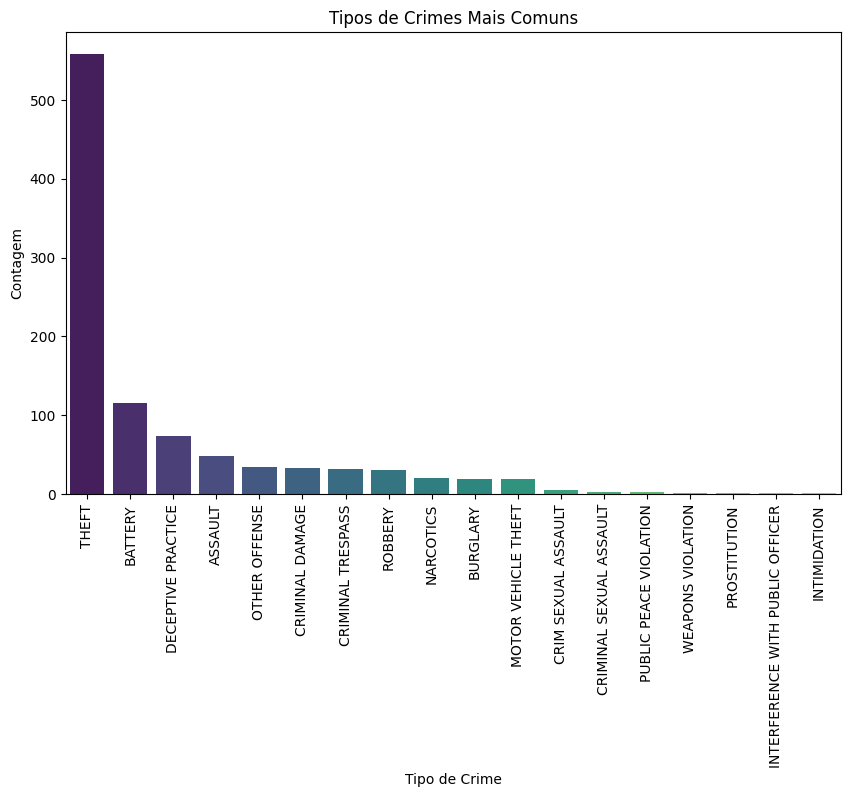

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem dos tipos de crimes
crime_counts = df['primary_type'].value_counts()

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values, palette='viridis')
plt.title('Tipos de Crimes Mais Comuns')
plt.xlabel('Tipo de Crime')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()


<ipython-input-15-3068873774>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


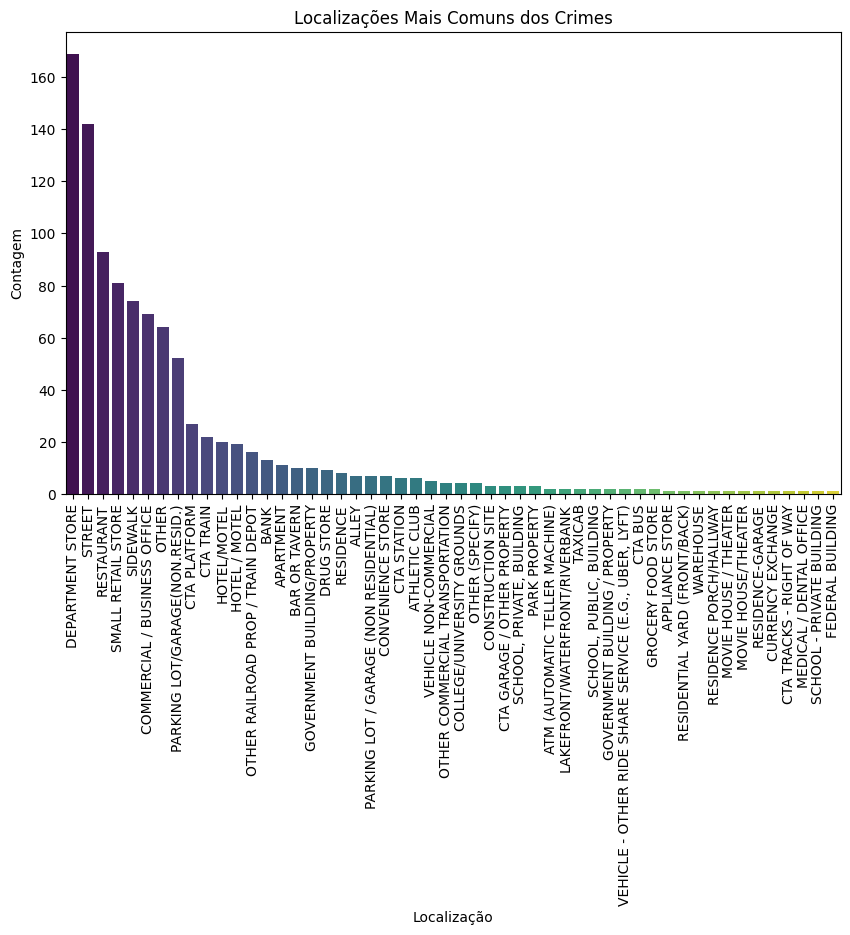

In [ ]:
# Contagem das localizações dos crimes
location_counts = df['location_description'].value_counts()

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Localizações Mais Comuns dos Crimes')
plt.xlabel('Localização')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()


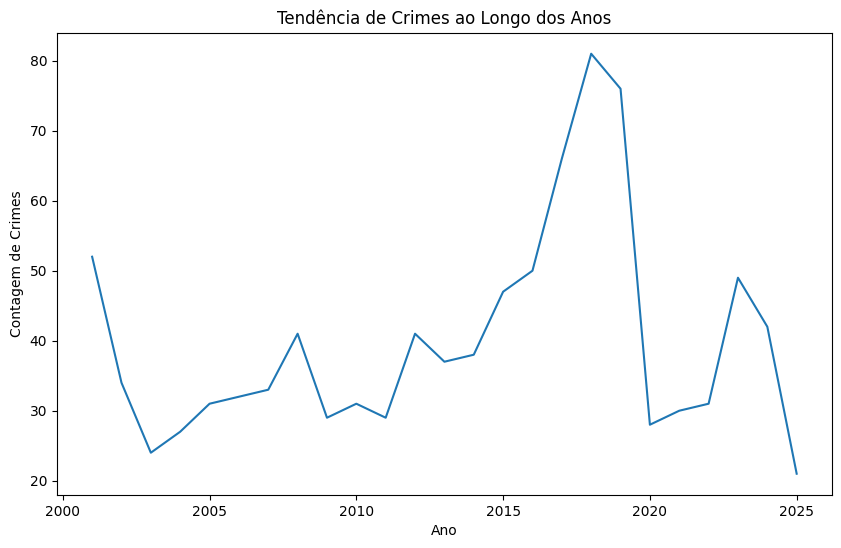

In [ ]:
# Contagem de crimes por ano
yearly_crime_counts = df.groupby('year').size()

# Visualização
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_crime_counts.index, y=yearly_crime_counts.values)
plt.title('Tendência de Crimes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem de Crimes')
plt.show()


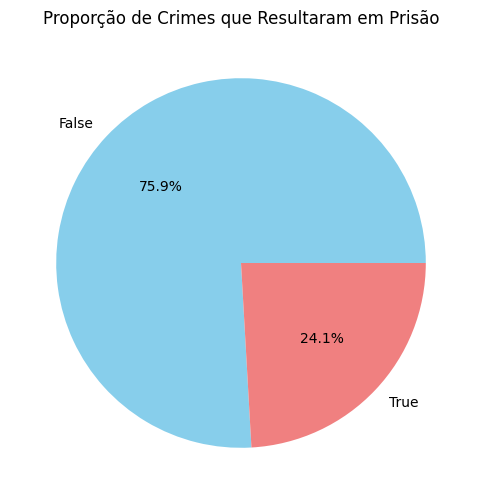

In [ ]:
# Proporção de crimes que resultaram em prisão
arrest_proportion = df['arrest'].value_counts(normalize=True)

# Visualização
plt.figure(figsize=(6, 6))
arrest_proportion.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporção de Crimes que Resultaram em Prisão')
plt.ylabel('')
plt.show()


In [ ]:
conclusao = """
Conclusão:
1. O tipo de crime mais comum é o Roubo.
2. A localização mais comum dos crimes são lojas de departamento.
3. A tendência de crimes ao longo dos anos mostra uma variação significativa, com um aumento entre 2017 e 2019.
4. Aproximadamente 24% dos crimes resultaram em prisão.
"""
print(conclusao)



Conclusão:
1. O tipo de crime mais comum é o Roubo.
2. A localização mais comum dos crimes são lojas de departamento.
3. A tendência de crimes ao longo dos anos mostra uma variação significativa, com um aumento entre 2017 e 2019.
4. Aproximadamente 24% dos crimes resultaram em prisão.



In [ ]:
# prompt: Preciso transformar a tabela que foi tratada em uma planilha google

!pip install --upgrade gspread gspread-dataframe google-auth --quiet
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default

# Authenticate and create the client
creds, project = default()
gc = gspread.authorize(creds)

# Create a new spreadsheet (or open an existing one)
# If creating a new one:
try:
    sh = gc.create('Chicago Crime Data Treated')
    print(f"Spreadsheet created: {sh.url}")
except gspread.exceptions.SpreadsheetNotFound:
    print("Spreadsheet already exists or cannot be created. Trying to open.")
    try:
        sh = gc.open('Chicago Crime Data Treated')
        print(f"Opened existing spreadsheet: {sh.url}")
    except gspread.exceptions.SpreadsheetNotFound:
        print("Spreadsheet not found. Please check the name or permissions.")
        sh = None # Ensure sh is None if opening fails

# If you successfully got a spreadsheet object
if sh:
    # Select the first worksheet
    worksheet = sh.sheet1

    # Write the DataFrame to the worksheet
    set_with_dataframe(worksheet, df)

    print("DataFrame successfully written to Google Sheet.")

Spreadsheet created: https://docs.google.com/spreadsheets/d/19qA9i6Ik7VlgDwd-4oF_KQ9JPruiDikTQUoZaVGh6s4
DataFrame successfully written to Google Sheet.
